## RNN

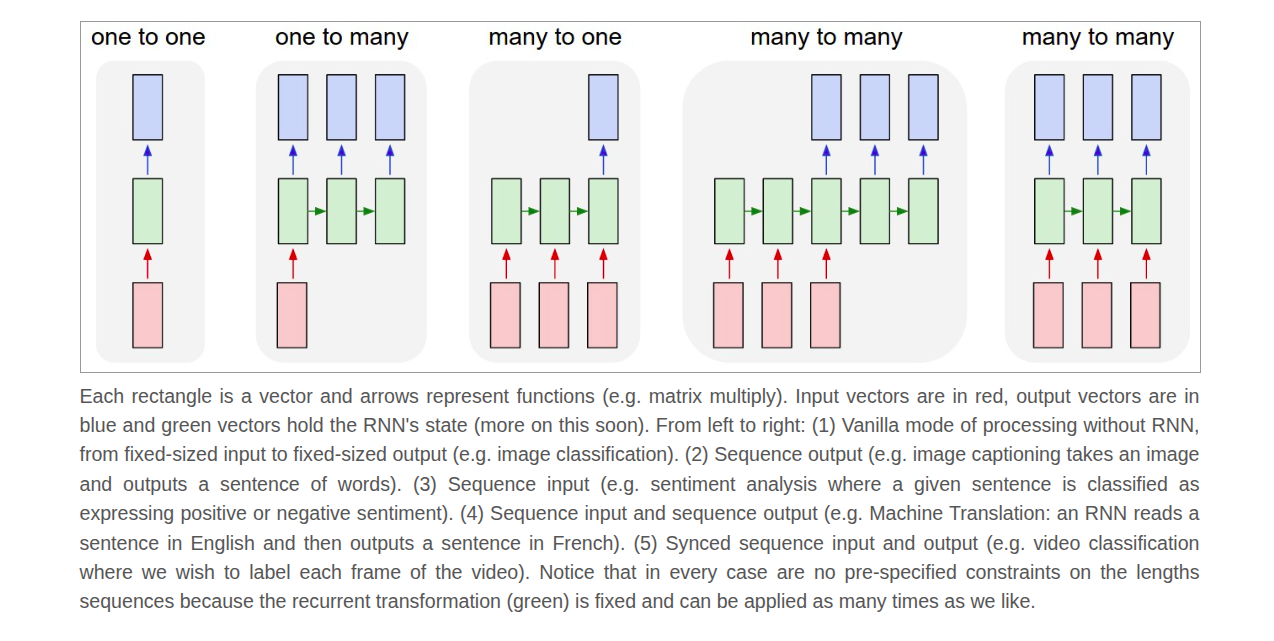

### Time Series Forecasting

In [5]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


In [39]:
def create_dataset(window_size = 30, steps = 1000 ):
    x_range = torch.linspace(start=0,end=50,steps=steps)

    sine_wave = torch.sin(x_range)
    # input will convert w.r.t to radian
    
#     print(x_range[:10])
#     print(sine_wave[:10])
    
    x = []
    y = []
    
    for i in range(len(sine_wave) - window_size):
        
        feature = sine_wave[i:i+window_size]
#         print(feature)
        target = sine_wave[i+window_size]
#         print(target)
        
        x.append(feature)
        y.append(target)
        
        
    X_tensor = torch.stack(x) 
    Y_tensor = torch.stack(y)
    
    return X_tensor.unsqueeze(-1),Y_tensor.unsqueeze(-1)
        
    

In [42]:
# unsqueezed in order to take batch_size as input

x_train,y_train = create_dataset(window_size=10,steps=1000)
print(x_train.shape,y_train.shape)

torch.Size([990, 10, 1]) torch.Size([990, 1])


In [118]:
class RNN(nn.Module):
    def __init__(self,input_size,hidden_size,output_size,num_layers):
        
        super().__init__()
        
        self.rnn = nn.RNN(input_size,hidden_size,num_layers = num_layers,batch_first = True)
        # n,L,Hin => batch_size , sequence_length , input_size
        
        # Fc layer as decoder
        self.fc = nn.Linear(hidden_size,out_features=output_size)
        
        
    def forward(self,x):
        
        # num_layers, batch_size, hidden_size
        h0 = torch.zeros(num_layers,x.size(0),hidden_size)
        
        out , _ = self.rnn(x,h0)
        
#         print(out.shape)
#         print(grad)

#         print(f"shape {out[:,9,:].shape}")
        
        out = self.fc(out[:,-1,:])
        
        return out
        

In [134]:
# Hyperparams
input_size = 1
hidden_size = 64
output_size = 1
num_layers = 2
epochs = 100
batch_size = 16


In [135]:
model = RNN(input_size=input_size,
            hidden_size=hidden_size,
            output_size=output_size,
            num_layers=num_layers)

In [136]:
# Training

lossi = []

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)


for epoch in range(epochs):
    
    # low is default zero
    idx = torch.randint(x_train.shape[0],(batch_size,))
    
    x_batch = x_train[idx]
    y_batch = y_train[idx]
        
#     print(x_batch.shape,y_batch.shape)
    pred = model(x_batch)
    
#     print(pred.shape)
    
    loss = loss_fn(pred,y_batch)
    lossi.append(loss.item())
#     print(loss)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.6f}')

#     break

Epoch [10/100], Loss: 0.041515
Epoch [20/100], Loss: 0.028634
Epoch [30/100], Loss: 0.004823
Epoch [40/100], Loss: 0.003144
Epoch [50/100], Loss: 0.000482
Epoch [60/100], Loss: 0.000209
Epoch [70/100], Loss: 0.000173
Epoch [80/100], Loss: 0.000253
Epoch [90/100], Loss: 0.000213
Epoch [100/100], Loss: 0.000103


In [137]:
len(lossi)

100

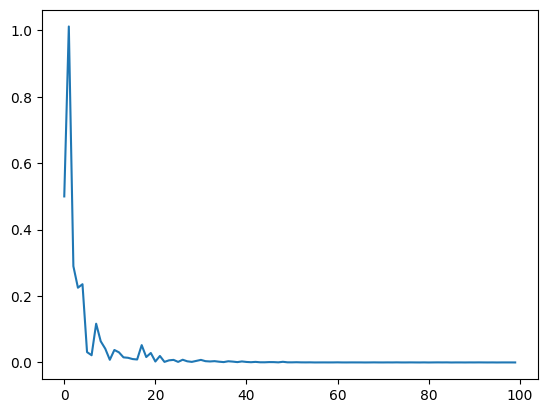

In [138]:
plt.plot(lossi)

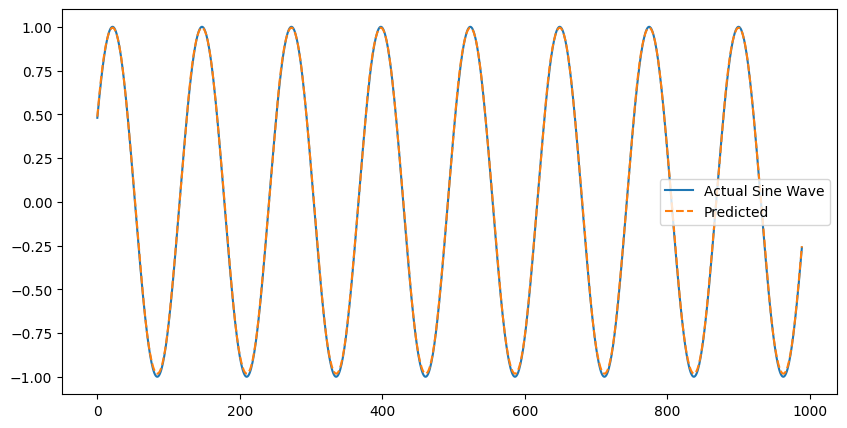

In [139]:
with torch.no_grad():
    predicted = model(x_train).detach().numpy()
    actual = y_train.detach().numpy()
    
plt.figure(figsize=(10,5))
plt.plot(actual, label='Actual Sine Wave')
plt.plot(predicted, label='Predicted', linestyle='--')
plt.legend()
plt.show()